In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [17]:
import datetime
now = datetime.datetime.now()
today_date = now.strftime("%e %B, %Y")  # https://deallen7.medium.com/managing-date-datetime-and-timestamp-in-python-pandas-cc9d285302ab


In [18]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

# Shor's Algorithm in Quantum Cryptography

## Brno University of Technology

### Martyns Nwaokocha

#### {{today_date}}

<div class = "alert alert-block alert-info">
    <b>CONTENT</b>
</div>

1. History of Quantum Cryptography
2. Introduction to Quantum Computing
    1. Qubits & Gates
    2. Quantum Fourier Transform
3. Shor's algorithm & circuit
3. Simulating between Classical & Quantum Computing

<div class = "alert alert-block alert-info">
    <b>History of Quantum Cryptography</b>
</div>

1. Quantum cryptography is the science of exploiting quantum mechanical properties to perform cryptographic tasks
2. Key examples include 
    1. quantum key distribution
    2. Shor's algorithm for factoring
3. It started from Stephen Wiesner and Gilles Brassard who worked on *Conjugate Coding* and later proposed a method for secure communication
4. Shor's algorithm was invented in 1994 by Peter Shor for finding the prime factors of a number.

<div class = "alert alert-block alert-info">
    <b>Introduction to Quantum Computing</b>
</div>

* Quantum computing is the manipulation of the superposition of qubits in order to solve problems that classical computing cannot do effectively.
* These problems include searching unsorted databases or integer factorization
* The key idea is to build algorithms that can use interference effects.
* This interference effect
    * makes wrong answers cancel out quickly and 
    * gives a high probability of measuring the right answer

<div class = "alert alert-block alert-info">
    <b>Qubits & Gates 1</b>
</div>

* Classical bits always have a completely well-defined state.
* However, a **qubit** is a classical bit with this restriction removed so that it can be in superposition of its states.
$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, |1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$
* The notation above is called Dirac notation used for representing vectors in quantum mechanics.
* The states $|0\rangle$ and $|1\rangle$ form an orthonormal basis so any 2D vector can be represented with a combination of these two states.
$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$
* The qubit is an element of the Hilbert space of 2 Dimensional complex numbers. 
* Qubits are normalised so that their norm equals 1


<div class = "alert alert-block alert-info">
    <b>Circuits & Measurements</b>
</div>

Classical circuit | Quantum circuit
:-: | :-: 
<img src="images/classical_circuit.png" alt="Drawing" style="width: 150px;"/> | <img src="images/quantum_circuit.png" alt="Drawing" style="width: 150px;"/>


* A quantum circuit is made of qubits, gates and measurements.
* The probability of measuring a state $|\psi \rangle$ in the state $|x\rangle$ is:
$$p(|x\rangle) = | \langle x| \psi \rangle|^2$$
* Global Phase refer to any overall factor $\gamma$ on a state for which $|\gamma|=1$
* States that differ only by a global phase are physically indistinguishable.
$$ |\langle x| ( \gamma |a\rangle) |^2 = | \gamma \langle x|a\rangle|^2 = |\langle x|a\rangle|^2 $$




<div class = "alert alert-block alert-info">
    <b>The Bloch Sphere: visual representation of a Qubit state</b>
</div>

* Consider the general qubit state:
$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$
* The Bloch sphere is used to represent qubit states





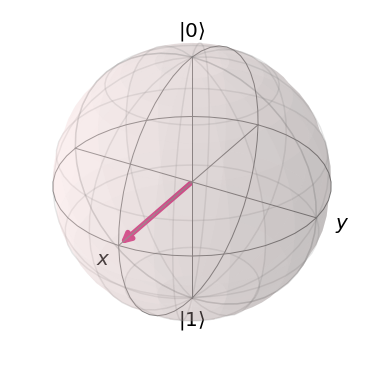

In [19]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [np.pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

In [20]:
n=2
qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)
# qc.x(1)
qc.z(1)
statevec = Statevector.from_instruction(qc).data
print(statevec)
qc.draw()
# plot_state_qsphere(statevec)

[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ Z ├
          └───┘└───┘

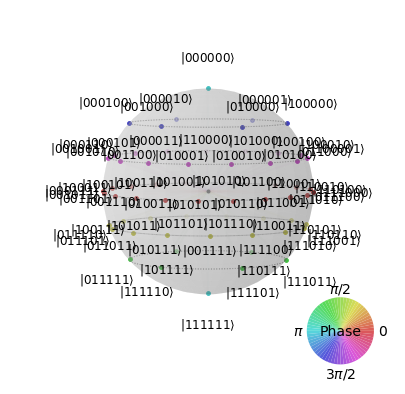

In [21]:
n = 6
qc = QuantumCircuit(n,n)
for i in range(n):
    qc.h(i)
    qc.rz(2 * np.pi/n, i)
statevec = Statevector.from_instruction(qc).data
# print(statevec)
# qc.draw()
plot_state_qsphere(statevec)

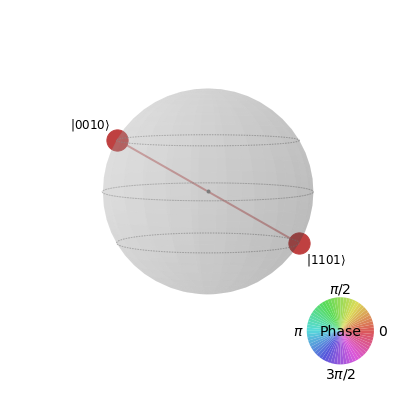

In [22]:
qc = QuantumCircuit(4)
qc.h(0)
for i in range(3):
    qc.cx(0, i+1)
qc.x(1)
statevec = Statevector.from_instruction(qc).data
#print(statevec)
# qc.draw()
plot_state_qsphere(statevec)

### Skip slide

In [23]:
from ipywidgets import IntSlider
slider = IntSlider(value=50)
slider

IntSlider(value=50)

### Notes